In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# min max normalization is just setting the values between 0-1 range. outliers will exist even after mmn.
# z score is similar to mmn but better. It can be used to detect outliers and we can allow certain data points inside the z score threshold which is genrally 2 or 3
# box plot shows us the actual outliers. use IQR and literally remove the outliers

In [3]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


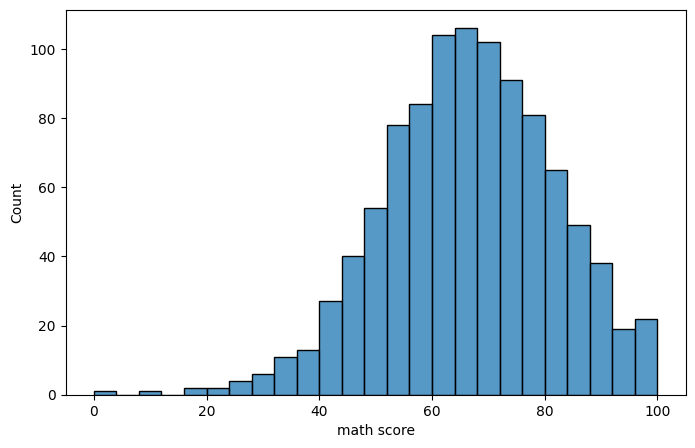

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'])
plt.show()

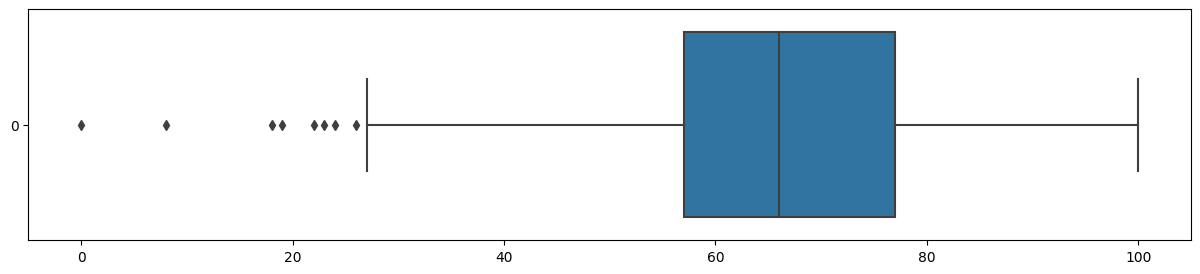

In [5]:
plt.figure(figsize=(15,3))
sns.boxplot(df['math score'],orient="h")
plt.show()

In [6]:
#min max normalization
normalizedMathScore=(df["math score"]-df["math score"].min())/(df["math score"].max()-df["math score"].min())

<Axes: xlabel='math score', ylabel='Count'>

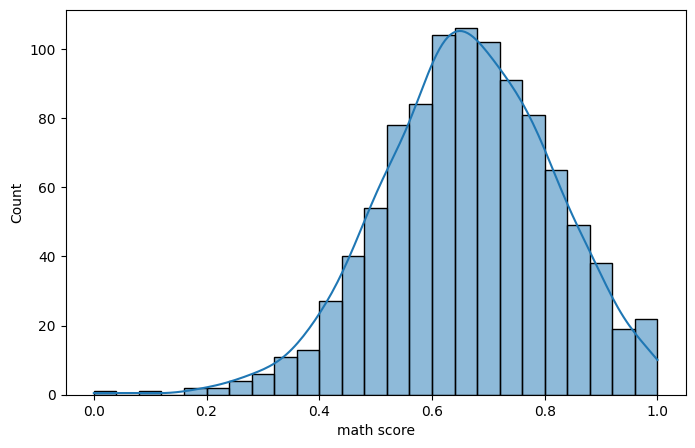

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(normalizedMathScore,kde=True)

<Axes: >

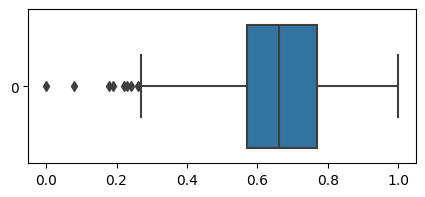

In [8]:
plt.figure(figsize=(5,2))
sns.boxplot(normalizedMathScore,orient="h")

### z-score normalization

In [11]:
normalizedReadingScore=(df["reading score"]-df["reading score"].mean())/df["reading score"].std()

<Axes: xlabel='reading score', ylabel='Count'>

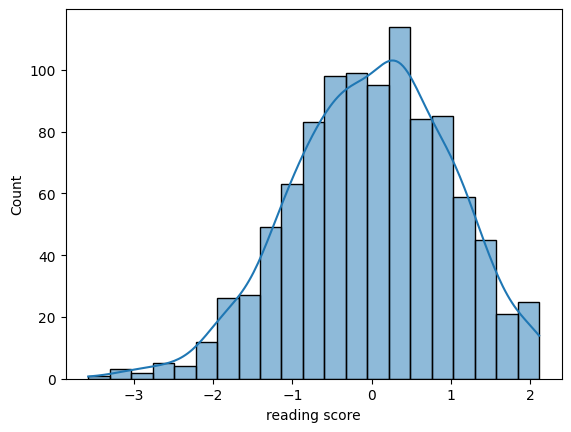

In [12]:
sns.histplot(normalizedReadingScore,kde=True)

In [29]:
#removing outliers based on threshold 2 and -2
normalizedReadingScoreList=list(normalizedReadingScore)
zOutliers=[]
for i in range(len(normalizedReadingScoreList)):
    if((normalizedReadingScoreList[i]>2) or (normalizedReadingScoreList[i]<-2)):
        zOutliers.append(i)
df2=df.drop(index=zOutliers)


<Axes: xlabel='reading score', ylabel='Count'>

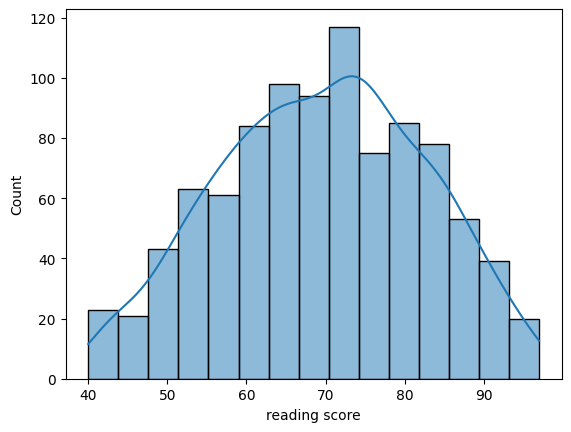

In [30]:
sns.histplot(x=df2["reading score"],kde=True)

<Axes: xlabel='reading score'>

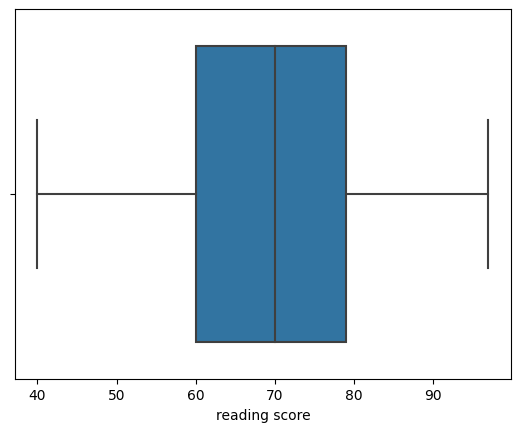

In [31]:
sns.boxplot(x=df2["reading score"])

### Removing Outliers using IQR

In [14]:
#removing the outliers from the math score
Q1=df["math score"].quantile(0.25)
Q3=df["math score"].quantile(0.75)
IQR=Q3-Q1

lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

In [15]:
#get the indices of the entries in the math score column which are outliers
outliersIndex=np.where((df['math score']>upperBound) | (df['math score']<lowerBound))[0]
outliersIndex

array([ 17,  59, 145, 338, 466, 787, 842, 980], dtype=int64)

In [16]:
df1=df.drop(index=outliersIndex)

<Axes: >

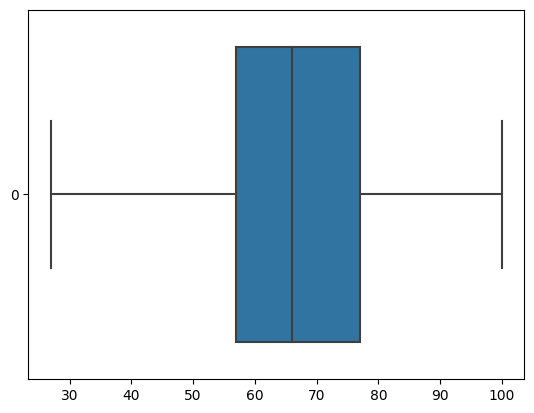

In [17]:
sns.boxplot(df1["math score"],orient="h")

<Axes: xlabel='math score', ylabel='Count'>

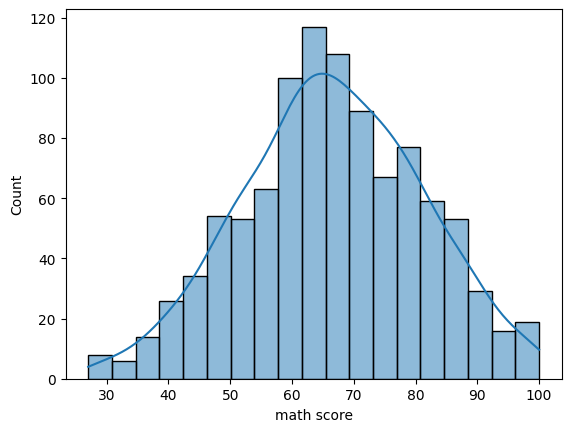

In [18]:
sns.histplot(df1["math score"],kde=True)